# 24.08.09 통계 학습 3회차: 기술통계 vs 추론통계

### 🔎목차

1. `기술통계 (Descriptive Statistics)`

    - 1.1 정의 및 개요

    - 1.2 중심경향성 (Central Tendency)
        - 평균, 중앙값, 최빈값

    - 1.3 산포도 (Dispersion)
        - 범위, 분산, 표준편차

    - 1.4 데이터 시각화
        - 히스토그램, 박스플롯

2. `추론통계 (Inferential Statistics)`

    - 2.1 정의 및 개요

    - 2.2 표본추출 (Sampling)
        - 표본과 모집단의 차이

    - 2.3 가설검정 (Hypothesis Testing)
        - p-값, 유의수준

    - 2.4 신뢰구간 (Confidence Interval)
        - 추정값의 불확실성
        
    - 2.5 회귀분석 (Regression Analysis)
        - 선형 회귀, 다중 회귀
        
3. `기술통계와 추론통계의 차이점`

    - 3.1 데이터 요약 vs 예측 및 일반화

    - 3.2 언제 어떤 통계를 사용할 것인가

4. `적용 사례`

    - 4.1 데이터 탐색 및 시각화에서의 기술통계

    - 4.2 모델 평가 및 가설 검정에서의 추론통계

5. `코드 실습`

    - 머신러닝 모델 평가를 위한 A/B 테스트 결과 분석

### 1. 기술통계 (Descriptive Statistics)

#### 1.1 정의 및 개요

- 기술통계는 데이터를 요약하고 설명하는 방법이다.

- 데이터의 특성을 파악하기 위해 평균, 중앙값, 최빈값 등과 같은 여러 지표를 사용하며, 데이터의 분포, 중심, 산포도를 시각적으로 나타내기도 한다.

- 데이터를 분석하는 첫 단계로, 데이터를 이해하고 향후 분석 방향을 설정하는 데 중요한 역할을 한다.

#### 1.2 중심경향성 (Central Tendency)

- 중심경향성은 데이터가 집중되는 정도를 나타낸다.

    1. 평균(Mean): 모든 데이터의 합을 데이터의 개수로 나눈 값.

        - 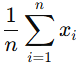

    2. 중앙값(Median): 데이터를 크기순으로 정렬했을 때, 중앙에 위치한 값.
    
        - 데이터의 분포가 비대칭일 때 평균보다 중앙값이 더 대표적인 값이 될 수 있다.

    3. 최빈값(Mode): 가장 자주 나타나는 값.
        - 데이터가 명목형일 때 유용하다.

In [1]:
import numpy as np

data = np.array([1, 2, 2, 3, 4, 7, 9])
mean = np.mean(data)
median = np.median(data)
mode = np.argmax(np.bincount(data))

print(f"평균: {mean}, 중앙값: {median}, 최빈값: {mode}")

평균: 4.0, 중앙값: 3.0, 최빈값: 2


#### 1.3 산포도 (Dispersion)

- 산포도는 데이터가 얼마나 흩어져 있는지를 나타낸다.

    1. 범위(Range): 최대값에서 최소값을 뺀 값.

        - 범위 = 최대값 − 최소값

    2. 분산(Variance): 데이터가 평균에서 얼마나 떨어져 있는지를 제곱한 후 평균을 낸 값.

        - 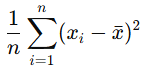

    3. 표준편차(Standard Deviation): 분산의 제곱근. 데이터의 평균에서 벗어난 정도를 나타낸다.

        - 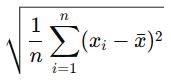

In [2]:
range_val = np.ptp(data)
variance = np.var(data)
std_dev = np.std(data)

print(f"범위: {range_val}, 분산: {variance}, 표준편차: {std_dev}")

범위: 8, 분산: 7.428571428571429, 표준편차: 2.7255405754769875


#### 1.4 데이터 시각화

- 데이터를 시각화하여 분포와 특성을 파악할 수 있다.

- 대표적인 도구로 히스토그램과 박스플롯이 있다.

    1. 히스토그램(Histogram): 데이터의 분포를 막대로 나타내는 그래프.

    2. 박스플롯(Boxplot): 데이터의 중앙값, 사분위수, 이상치를 시각적으로 표현한다.

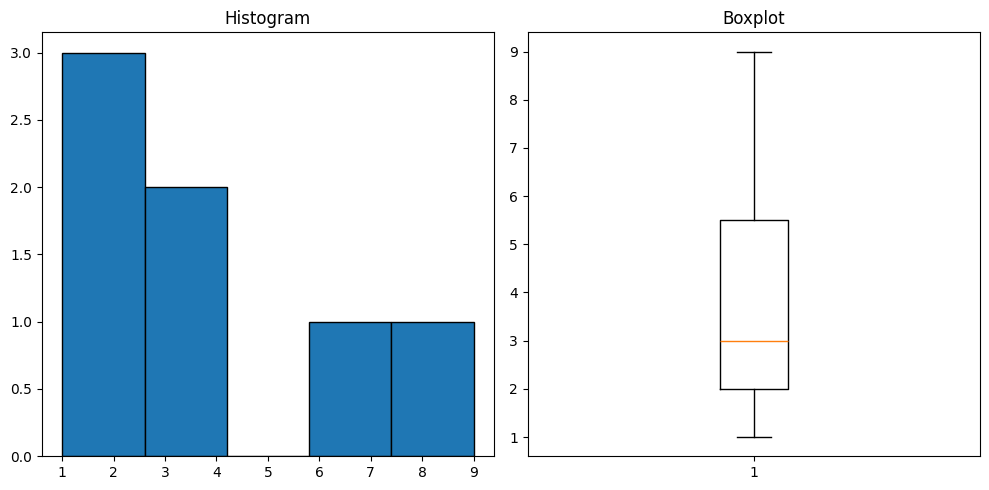

In [12]:
import matplotlib.pyplot as plt

# 서브플롯 설정
plt.figure(figsize=(10, 5))  # 전체 그림 크기 설정

plt.subplot(1,2,1)
plt.hist(data, bins=5, edgecolor='black')
plt.title('Histogram')
# plt.show()

plt.subplot(1,2,2)
plt.boxplot(data)
plt.title('Boxplot')
# plt.show()

# 서브플롯 간의 간격 조정
plt.tight_layout()

# 그래프 시각화
plt.show()

### 2. 추론통계(Inferential Statistics)

#### 2.1 정의 및 개요

- 추론통계는 표본 데이터를 사용하여 모집단의 특성을 추정하거나 가설을 검정하는 방법.

- 주어진 데이터를 바탕으로 더 넓은 집단에 대해 결론을 내리는 데 사용된다.

#### 2.2 표본추출 (Sampling)

- 표본추출은 모집단에서 일부를 선택하여 분석하는 과정.

- 표본이 모집단을 잘 대표해야 신뢰할 수 있는 결론을 내릴 수 있다.

    1. 단순 랜덤 표본(SRS): 무작위로 선택된 표본.

    2. 층화 표본(Stratified Sampling): 모집단을 층으로 나누고 각 층에서 표본을 선택.

In [13]:
population = np.random.randint(1, 100, 1000)
sample = np.random.choice(population, 100, replace=False)
print(f"표본 평균: {np.mean(sample)}")

표본 평균: 53.81


#### 2.3 가설검정 (Hypothesis Testing)

- 가설검정은 주어진 데이터가 특정 가설을 지지하는지 평가하는 방법.

    1. 귀무가설(Null Hypothesis): 가설검정에서 기본적으로 받아들이는 가설.

    2. 대립가설(Alternative Hypothesis): 귀무가설이 틀렸다는 가설.

- t검정 예제 코드

    1. t검정을 예제로 드는 이유

        - 두 그룹 간 비교: t-검정은 두 개의 독립적인 그룹(예: A와 B)의 평균을 비교하여 차이가 있는지를 검증하는 데 적합하다. A/B 테스트와 같은 실험 디자인에서 자주 사용된다.

        - 통계적 유의성 평가: t-검정은 p-값을 통해 두 그룹 간의 차이가 우연에 의한 것인지, 실제로 의미 있는 차이가 있는지를 평가한다. 이는 의사결정에 중요한 정보를 제공한다.

        - 정규성 가정: t-검정은 데이터가 정규 분포를 따른다는 가정을 바탕으로 수행되므로, 일반적인 상황에서 신뢰할 수 있는 결과를 제공한다.

        - 실용적인 적용: 마케팅, 심리학, 생물학 등 다양한 분야에서 두 개의 처리나 그룹의 효과를 비교할 때 널리 사용된다. 예를 들어, 두 가지 광고 전략의 효과를 비교하거나, 두 개의 약물의 효과를 평가할 때 유용하다.

    2. z검정과의 비교

        - 샘플 크기: t-검정은 작은 샘플에 적합하고, z-검정은 큰 샘플에 적합하다.

        - 모집단 분산: t-검정은 모집단의 분산을 모를 때 사용되고, z-검정은 모집단의 분산이 알려진 경우에 사용된다.

        - 분포 유형: t-검정은 t-분포를, z-검정은 정규 분포를 사용한다.

- t-검정의 분포

    1. t-검정은 두 그룹 간의 평균 차이를 비교할 때 사용되며, 표본의 분산이 알려지지 않은 경우에도 적용할 수 있다.
    
    2. t-분포를 사용한다.
 
    3. t-분포는 샘플 크기가 작을 때 표본 평균의 분포가 더 넓고 두꺼운 꼬리를 가지므로, 작은 샘플에서도 신뢰할 수 있는 결과를 제공한다.

- z-검정의 분포

    1. z-검정은 샘플 크기가 크고(n ≥ 30) 모집단의 분산이 알려져 있는 경우에 사용된다.

    2. 모집단이 정규 분포를 따르지 않더라도 중앙극한정리에 의해 샘플 평균이 정규 분포에 가까워질 수 있다.

    3. z-검정은 정규 분포를 사용한다. 샘플 크기가 클 경우, 샘플 평균의 분포는 정규 분포에 가까워지기 때문에 z-검정이 적합하다.

In [14]:
from scipy import stats

group1 = np.random.normal(10, 5, 100)
group2 = np.random.normal(12, 5, 100)
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -3.554171853261011, P-Value: 0.00047411522415180573


#### 2.4 신뢰구간 (Confidence Interval)

- 신뢰구간은 모집단의 특성에 대해 표본이 어느 정도 정확히 추정하는지를 나타낸다.

- 신뢰구간: 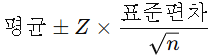

#### 2.5 회귀분석 (Regression Analysis)

- 회귀분석은 변수 간의 관계를 모델링하는 방법으로, 선형 회귀는 가장 기본적인 형태이다.

-  

- 가중치, 절편, 오차(모델이 설명하지 못하는 부분)로 이루어져 있다.

In [15]:
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100)
model = LinearRegression().fit(X, y)

print(f"기울기: {model.coef_}, 절편: {model.intercept_}")

기울기: [2.6434202], 절편: 2.4441576411890726


### 3. 기술통계와 추론통계의 차이점

#### 3.1 데이터 요약 vs 예측 및 일반화

- 기술통계: 데이터 자체를 요약하는 데 중점을 둔다.

- 추론통계: 표본 데이터를 사용해 모집단에 대한 예측 및 일반화를 목적으로 한다.

#### 3.2 언제 어떤 통계를 사용할 것인가

- 기술통계: 데이터를 탐색하고 요약할 때.

- 추론통계: 데이터에서 결론을 내리고 가설을 검증할 때.

### 4. 적용 사례

#### 4.1 데이터 탐색 및 시각화에서의 기술통계

- 데이터 `분석의 초기 단계`에서 기술통계를 사용해 데이터의 특성을 파악하고, 이상치와 분포를 시각적으로 확인한다.

#### 4.2 모델 평가 및 가설 검정에서의 추론통계

- `모델의 성능을 평가`하거나 `실험 결과를 분석`할 때, 추론통계를 사용해 가설을 검증하고 결과의 신뢰성을 판단한다.

### 5. 코드 실습

- 머신러닝 모델 평가를 위한 A/B 테스트 결과 분석

    1. A/B 테스트 결과를 분석하여 각 그룹의 전환율을 비교한다.

    2. t-검정을 통해 통계적으로 유의미한 차이가 있는지 확인한다.

#### 🔎np.random.binomial(1, 0.4, 50)

1. 이 코드는 이항 분포를 따르는 랜덤 숫자를 생성한다.

2. 첫 번째 인자 1은 시행 횟수(한 번의 시도)를 의미한다.

3. 두 번째 인자 0.4는 성공 확률을 의미한다. 즉, 각 시도에서 40%의 확률로 '성공'(1)이 발생한다.

4. 세 번째 인자 50은 생성할 샘플의 개수를 의미한다. 따라서, 이 코드는 50개의 0 또는 1로 구성된 배열을 생성한다.

#### 🔎.tolist()

- 생성된 NumPy 배열을 리스트로 변환한다.

#### 🔎데이터 생성 결과

- 두 개의 리스트를 합쳐서 총 100개의 변환 결과를 생성한다.

- 첫 50개는 버전 'A'에 해당하고, 다음 50개는 버전 'B'에 해당한다.

In [20]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy import stats

# np로 예제 데이터 생성
data = {
    'version': ['A'] * 50 + ['B'] * 50,  # 리스트+리스트=리스트
    'conversion': np.random.binomial(1, 0.4, 50).tolist() + np.random.binomial(1, 0.45, 50).tolist()
}
df = pd.DataFrame(data)

# 기술통계: 버전 A/B별 평균 몇 명이 전환했는지?
conversion_rate_A = df[df['version'] == 'A']['conversion'].mean()
conversion_rate_B = df[df['version'] == 'B']['conversion'].mean()

# t-검정: 두 개의 독립적인 샘플(A와 B 버전의 변환 결과)에 대해 t-검정을 수행하여 두 그룹 간의 차이가 통계적으로 유의미한지를 분석한다.
t_stat, p_val = stats.ttest_ind(df[df['version'] == 'A']['conversion'],
                                df[df['version'] == 'B']['conversion'])

print(f"Conversion Rate A: {conversion_rate_A}")
print(f"Conversion Rate B: {conversion_rate_B}")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# 결과 해석
if p_val < 0.05:
    print("결과: Statistically significant difference between A and B.")
else:
    print("결과: No statistically significant difference between A and B.")

Conversion Rate A: 0.38
Conversion Rate B: 0.34
T-Statistic: 0.4128374772337118, P-Value: 0.680627525838958
결과: No statistically significant difference between A and B.


#### 🔎t-검정 수행

- stats.ttest_ind() 함수는 두 독립적인 샘플 간의 평균 차이를 검정한다. 이 경우, 'A'와 'B' 버전의 변환 결과를 비교한다.

- df[df['version'] == 'A']['conversion']: 데이터프레임 df에서 'A' 버전의 변환 결과(0 또는 1)를 선택하여 A 그룹의 데이터를 추출한다.

- df[df['version'] == 'B']['conversion']: 데이터프레임 df에서 'B' 버전의 변환 결과를 선택하여 B 그룹의 데이터를 추출한다.

#### 🔎t-검정 결과

- t_stat: t-검정 통계량이다. 이 값은 두 그룹의 평균 차이를 표준 오차로 나눈 값으로, 두 그룹 간의 차이가 얼마나 큰지를 나타낸다.

- p_val: p-값으로, 이는 두 그룹 간의 평균 차이가 우연히 발생할 확률을 나타낸다.
    
    - 일반적으로 p-값이 0.05보다 작으면 두 그룹 간의 차이가 통계적으로 유의미하다고 판단한다.

#### 🔎해석

1. t-검정 통계량 (t_stat): 값이 클수록 A와 B 그룹 간의 차이가 크다는 것을 의미한다.

    - t-검정 통계량이 0에 가까울수록 두 그룹의 평균이 유사하다는 것을 나타낸다.

2. p-값 (p_val): 값이 0.05보다 작으면, A와 B 그룹 간의 평균 차이가 통계적으로 유의미하다고 해석할 수 있다.

    - 즉, 버전 A와 버전 B의 변환 성공률이 서로 다르다고 결론지을 수 있다.
    
    - 반대로 p-값이 0.05보다 크면, 두 그룹 간에 유의미한 차이가 없다고 판단할 수 있다.


#### 🔎추가 설명

1. t-검정은 두 그룹의 데이터가 정규 분포를 따른다는 가정 하에 수행된다.

2. 데이터가 정규 분포를 따르지 않거나 분산이 크게 다를 경우, 비모수적인 검정 방법(예: Mann-Whitney U 검정)을 고려해야 할 수 있다.

3. 이 검정은 A/B 테스트에서 두 가지 처리(예: 두 가지 웹사이트 디자인, 마케팅 전략 등)의 효과를 비교할 때 매우 유용하게 사용된다.

#### 🔎다른 방법으로 예제 데이터 생성

In [17]:
import pandas as pd
from scipy import stats

# 예제 데이터 생성
data = {'version': ['A']*100 + ['B']*100,
        'conversion': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]*10 + [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]*10}
df = pd.DataFrame(data)

# 버전별 전환율 계산
conversion_rate_A = df[df['version'] == 'A']['conversion'].mean()
conversion_rate_B = df[df['version'] == 'B']['conversion'].mean()

# t-검정 수행
t_stat, p_val = stats.ttest_ind(df[df['version'] == 'A']['conversion'],
                                df[df['version'] == 'B']['conversion'])

print(f"Conversion Rate A: {conversion_rate_A}")
print(f"Conversion Rate B: {conversion_rate_B}")
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

Conversion Rate A: 0.6
Conversion Rate B: 0.7
T-Statistic: -1.4832396974191322, P-Value: 0.13960073022955727
